In [49]:
import yfinance as yf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')


In [50]:
df = yf.download("Gold",start = '2001-01-01',end ='2023-10-05',progress = False)

In [51]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,16.379999,17.190001,16.320000,17.120001,12.392012,1817200
2001-01-03,17.200001,17.340000,16.200001,16.230000,11.747798,2095400
2001-01-04,16.150000,16.190001,15.700000,15.770000,11.414839,1620800
2001-01-05,15.880000,16.240000,15.240000,15.370000,11.125300,1679400
2001-01-08,15.520000,15.750000,15.360000,15.550000,11.255591,896200


In [52]:
df['Return'] = df['Adj Close'].pct_change() * 100

In [53]:
df['Lagged_Return'] = df.Return.shift()

In [54]:
df = df.dropna()

# SPLITTING DATASET

In [55]:
train = df['2001':'2021']
test = df['2022':'2023']

In [56]:
# Create train and test sets for depedent and independent variables
x_train = train["Lagged_Return"].to_frame()
y_train = train["Return"]
x_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]


# MODEL TRAINING 

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
model = LinearRegression()

In [59]:
model.fit(x_train,y_train)

LinearRegression()

In [60]:
predictions = model.predict(x_test)

In [61]:
out_of_sample_results = y_test.to_frame()


In [62]:
# Add a column of "out_of_sample"  predictions to the dataframe:
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(x_test)

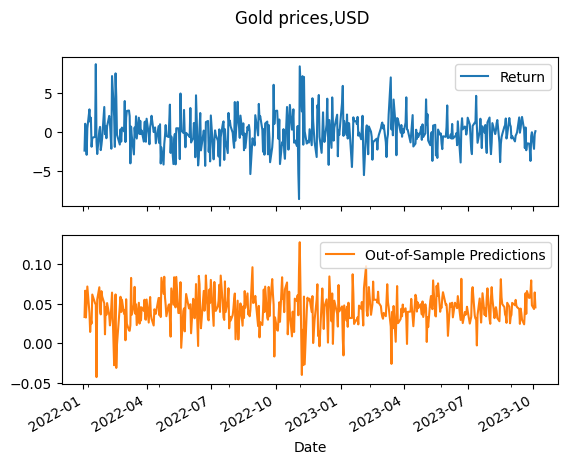

In [63]:
# # Add a column of "out_of_sample"  predictions to the dataframe:
# out_of_sample_results["out-of-sample Predictions"] = model.predict(x_test)
out_of_sample_results.plot(subplots= True,title="Gold prices,USD")
plt.show()